# Elements of Statistics, Econometrics and Time Series Analysis

### Anastasiia Kasprova

## Problem 1: Descriptive Statistics

#### 1.1. Simulate (with a fixed seed) a sample of size n = 50 from the normal distribution with $µ_{1}$ = 10 and $σ^2_{1}$ = 9.

In [14]:
set.seed(888)
mySample <- rnorm(50, mean=10, sd=3)

#### (1.1a) For this data compute the sample mean, variance, median, lower and upper quartiles.
    

In [16]:
cat("Mean =", mean(mySample),"\n")
cat("Variance =", var(mySample),"\n")
cat("Median =" , median(mySample),"\n")
cat("Lower and Upper Quantiles: ", quantile(mySample, probs=c(0.25,0.75)),"\n")
# summary(mySample)

Mean = 9.820709 
Variance = 10.73391 
Median = 9.904281 
Lower and Upper Quantiles:  7.74264 11.89563 


#### (1.1b) Plot the histogram, the Box-plot (or alternatively violin plots from ggplot).

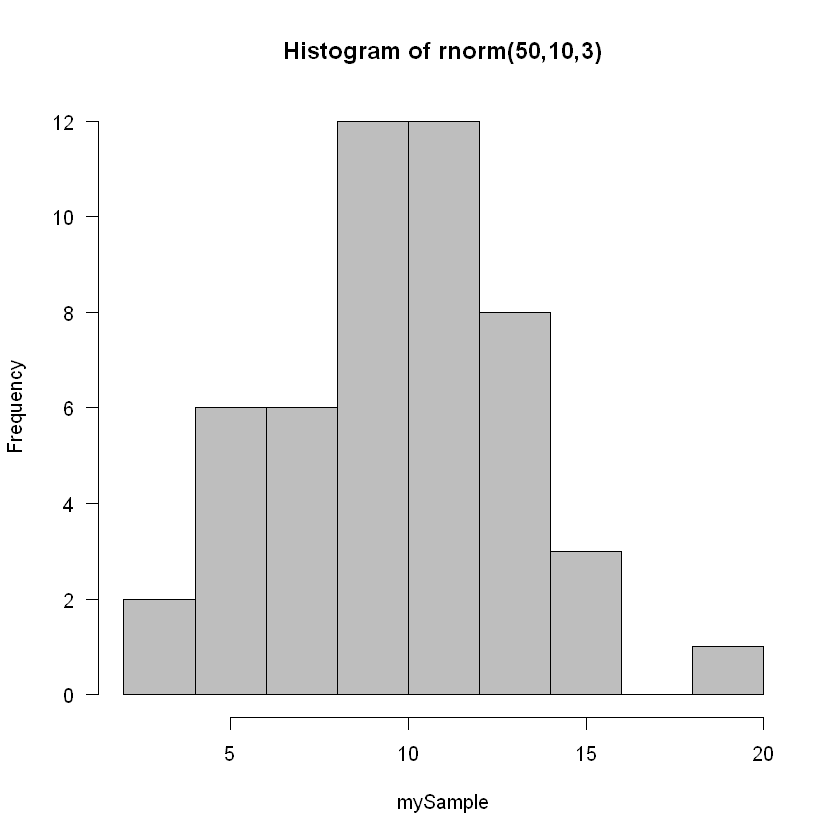

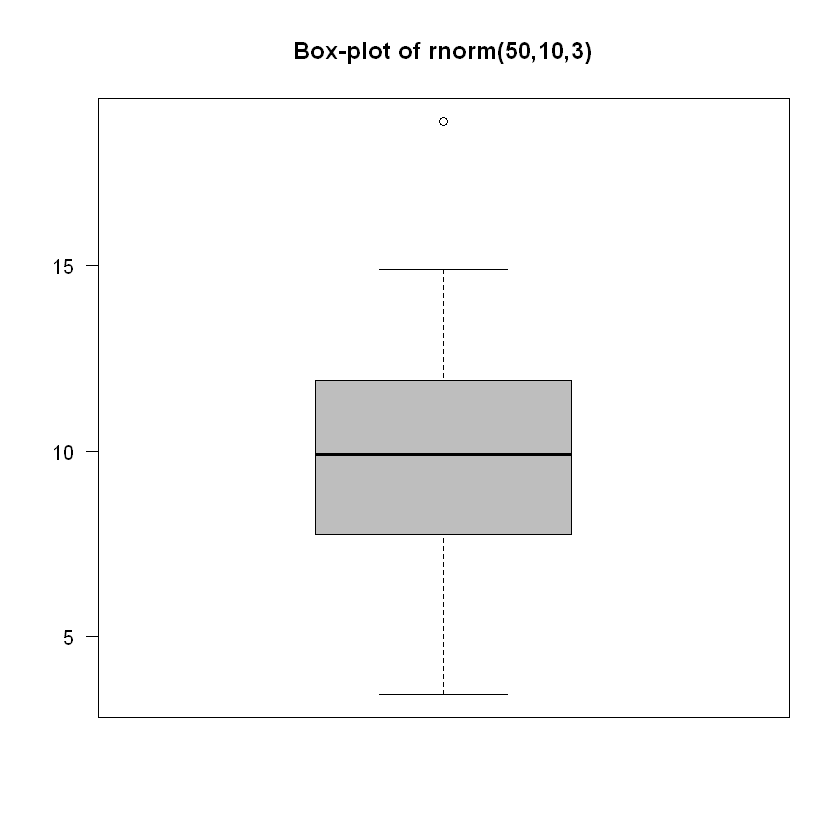

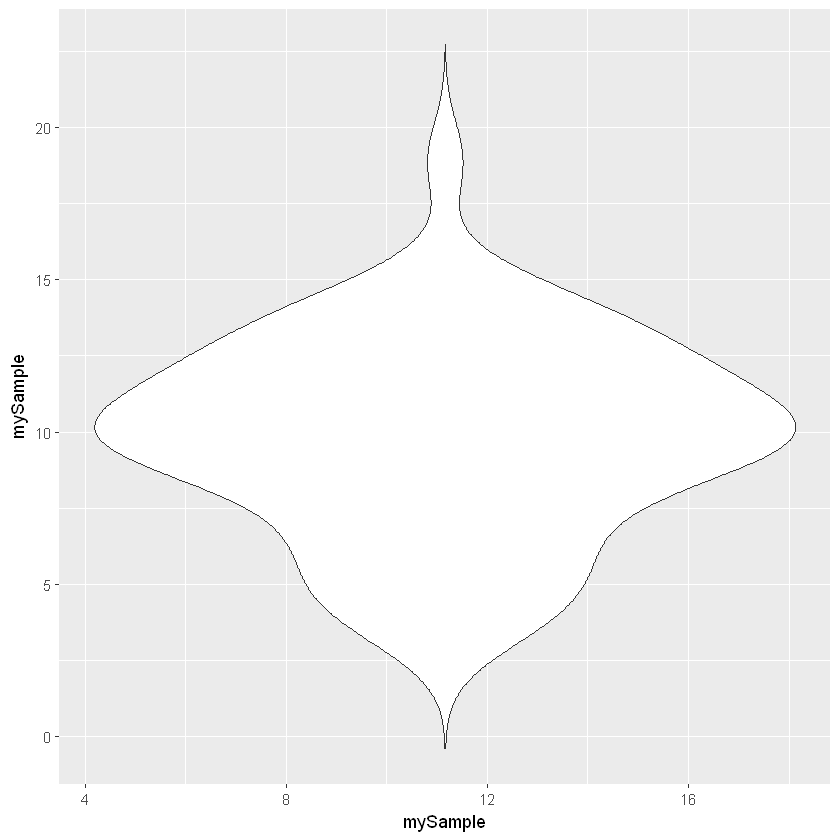

In [56]:
hist(mySample, 
     main="Histogram of rnorm(50,10,3)", 
     border="black", 
     col="grey",
     las=1,
     breaks=10)

boxplot(mySample, 
        main="Box-plot of rnorm(50,10,3)", 
        outline = T,
        border="black", 
        col="grey",
        las=1)

require(ggplot2)
ggplot() + aes(mySample,mySample) + geom_violin(trim=FALSE)

#### 1.2. In practice the data is always very heterogenous. To reflect it we contaminate the data by adding an outlier or a subsample with different characteristics.

#### (1.2a) Add to the sample an outlier equal to a single value xo taken on a grid of length p+1 = 50 between 16 and 24, e.g. $x_{0,i} = 16+i·(24−16)/p$ with i = 0, ..., p. Assess the impact of the (size of) outlier on the above measures (plot them appropriately) and figures

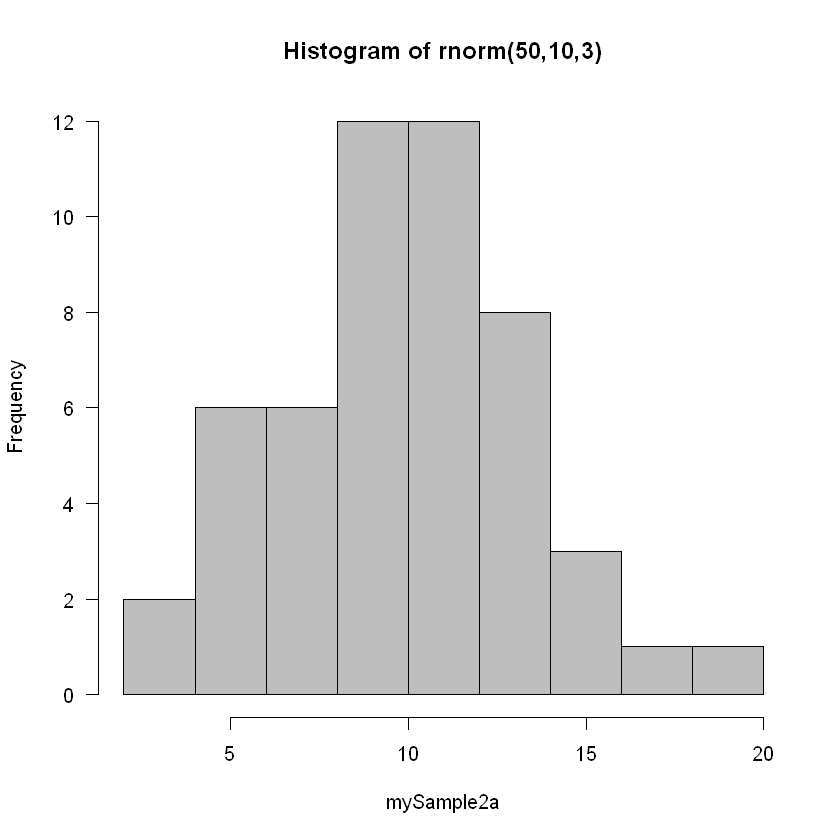

In [57]:
#Add outlier
set.seed(888)
i <- sample(0:49,1,replace=T)
x <- 16 + i * (24 - 16) / 49
mySample2a <- append(mySample,x)
        
hist(mySample2a, 
     main="Histogram of rnorm(50,10,3)", 
     border="black", 
     col="grey",
     las=1,
     breaks=10)

The values of outlier which are close to 16 will have smaller impact than values close to 24.

#### (1.2b) To make the sample more heterogenous add to the original e sample a new sample of size m simulated from N(20, 2^2), i.e. µ = 20 and σ= 4. The size m will obviously influence the above measures. Vary m from 10 to 100.


In [58]:
set.seed(888)
m <- sample(10:100,1,replace=T)
b <- rnorm(m, mean=20, sd=2)
mySample2b <- append(mySample2a,b)

#### (1.2c) Plot Box-plots (or violin plots) and histograms for each subsample individually and for the sample for a few different values of m.


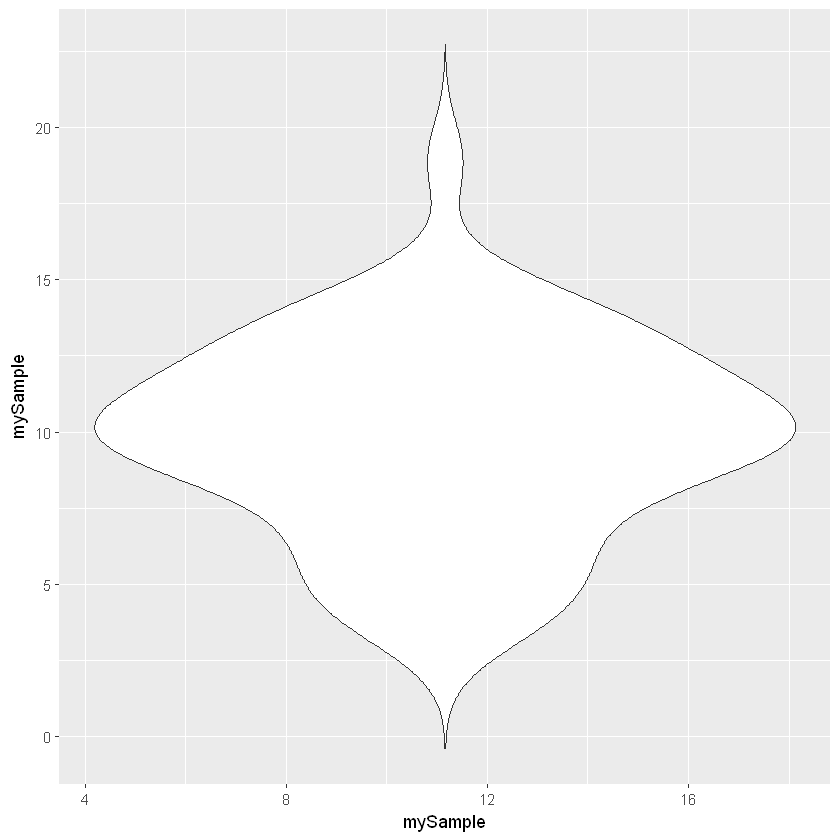

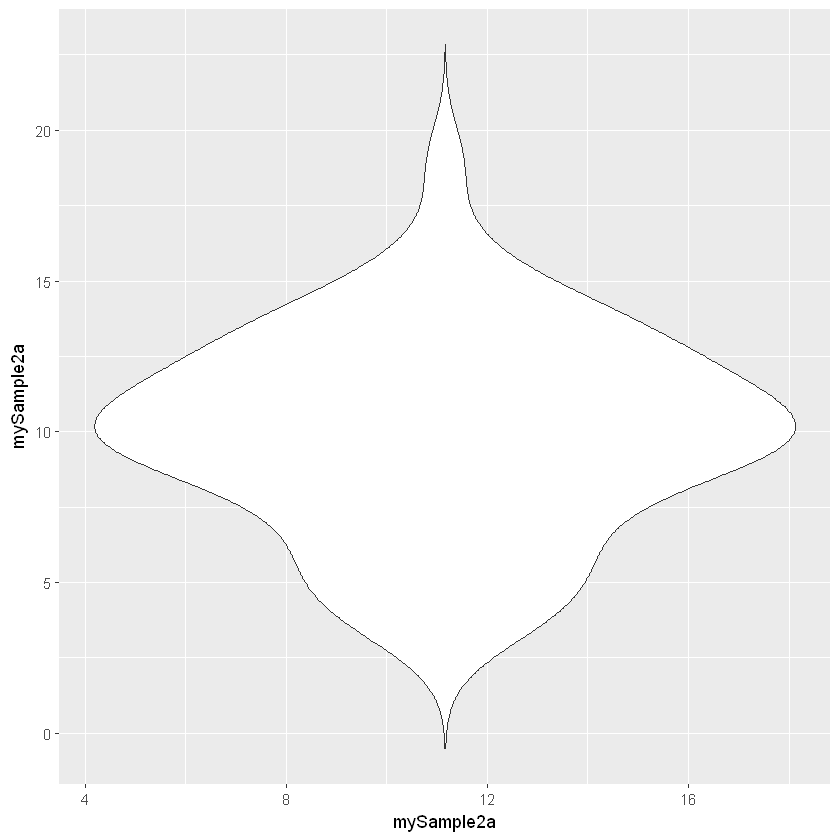

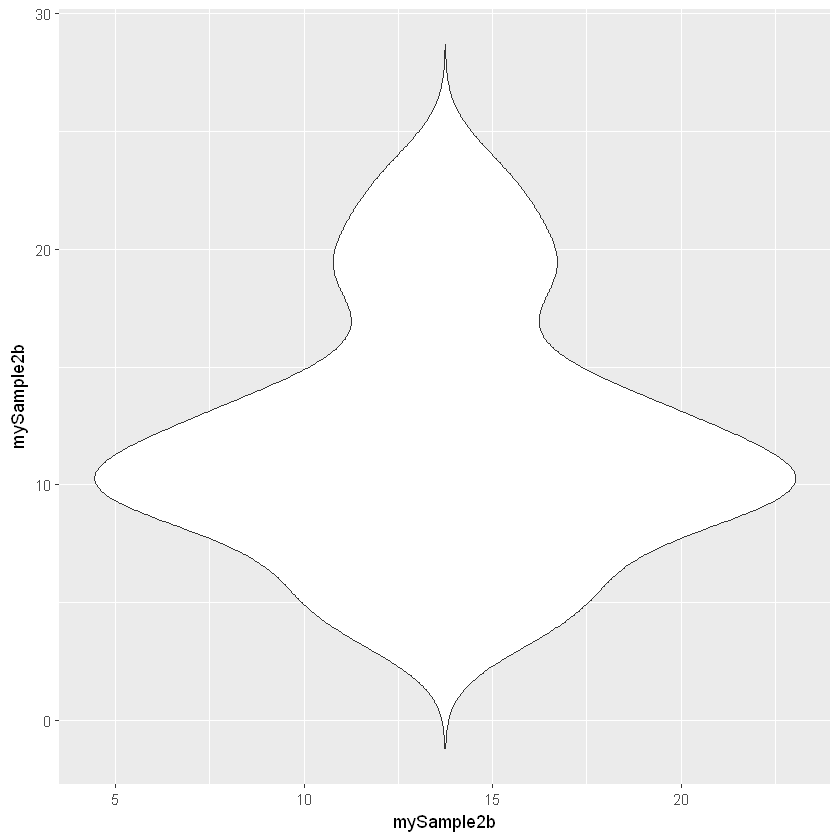

In [61]:
require(ggplot2)

ggplot() + aes(mySample,mySample) + geom_violin(trim=FALSE)
ggplot() + aes(mySample2a,mySample2a) + geom_violin(trim=FALSE)
ggplot() + aes(mySample2b,mySample2b) + geom_violin(trim=FALSE)



#### (1.2d) Make animated or interactive graphics (with manipulate, plotly, ggplot, etc.) to visualize the impact of m on the histogram and location measures (added as vertical lines in the graph) of the data.

#### 1.3. Next step is to simulate two dependent data sets. The objective is to simulate two correlated samples or samples with a specific form of dependence.
#### (1.3a) Let $U \sim N(0,1)$ and $\ V \sim N(0,1)$. Let $U^*=U$ and $V^*=\rho U + \sqrt{1-\rho^2} V $. Prove that $Corr(U^*, V^*) =\rho$ and the variances of both variables $U^∗$ and $V^∗$ equal one.


Let's prove the the concept theoretically.

$ Var(X) = E[X^2] - E[X]^2 \\ 
E[X^2]=Var(X) + E[X]^2 $

$
Var(U^*) = Var(U) = 1 \\
Var(V^*) = E[(V^*)^2] - E[V^*]^2 = \\
=E[(\rho U + \sqrt{1-\rho^2}V)^2] - E[\rho U + \sqrt{1-\rho^2}V]^2 = \\ =E[(\rho^2 U^2 + (1-\rho^2) V^2 + \rho U \sqrt{1-\rho^2}V)] - (\rho E[U] + \sqrt{1-\rho^2}E[V])^2 =\\
= \rho^2 E[U^2] + (1-\rho^2) E[V^2] + \rho \sqrt{1-\rho^2} E[U] E[V] = \\
= \rho^2 E[U^2] + (1-\rho) E[V^2] = \\
= \rho^2 (Var(U) + E[U]^2) + (1-\rho^2) (Var(V)+E[V]^2)= \\
= \rho^2(1+0)+ (1-\rho^2)(1+0)=\\ 
=\rho^2 + 1 - \rho^2=1
$

$
Corr(U^*, V^*) = \frac{E[(U^*-E[U^*])(V^*-E[V^*])]}{\sigma_{U^*}\sigma_{V^*}} = \\ 
=E[(U-E[U])(\rho U + \sqrt{1-\rho^2} V - \rho E[U] - \sqrt{1-\rho^2}E[V])] = \\
=E[U(\rho U + \sqrt{1-\rho^2} V)] =\\
=\rho E[U^2] + \sqrt{1-\rho^2} E[U] E[V] = \\ =\rho E[U^2] = \rho(Var(U) + E[U]^2) = \\
=\rho (1 + 0) = \\
=\rho
$

In [154]:
# to prove the concept numerically we need the set of size bigger than 50

#setup
n <-100000 #the bigger n the better converges
rho <- runif(1,0,1)

#denerate reproducible normal distributions V and U
set.seed(888) 
U <- rnorm(n)
V <- rnorm(n)

#let U∗ = U and V∗ = ρU + sqrt(1-ρ^2)V
U1 <- U
V1 <- rho*U+sqrt(1-rho^2)*V

#compare the values for Corr(U∗,V∗) and ρ to prove the equality
cat("Cor(U*,V*) = ",cor(U1,V1),"\n")
cat("pho = ",cor(U1,V1),"\n")

Cor(U*,V*) =  0.6742091 
pho =  0.6742091 


In [156]:
#prove that variances of both variables U∗ and V∗ equal one
cat("var(U*) = ",var(U1),"\n")
cat("var(V*) = ",var(V1),"\n")

var(U*) =  1.000746 
var(V*) =  1.007506 


#### (1.3b) Use the above idea to simulate two samples from a normal distribution with a prespecified distribution ρ. Compute the correlation coefficients of Pearson and of Spearman

In [158]:
#the simulation was done above
#here we compute the correlation coefficients of Pearson and of Spearman¶
cat("Pearson correlation coeficient: ",cor(U1,V1, method="pearson"),"\n")
cat("Spearman correlation coeficient: ",cor(U1,V1, method="spearman"),"\n")


Pearson correlation coeficient:  0.6742091 
Spearman correlation coeficient:  0.6585834 


#### (1.3c) Make a nonlinear but monoton transformation of V*, say log or exp. Check the impact of this transformation on the correlation coefficients.


In [163]:
#log transformation of V*
V2<-exp(V1)
#impact of exp transformation on the correlation coefficients
cat("Pearson correlation coeficient before exp transfromation:",cor(U1,V1, method="pearson"),"\n")
cat("Pearson correlation coeficient after exp transfromation:",cor(U1,V2, method="pearson"),"\n")
cat("Spearman correlation coeficient before exp transfromation:",cor(U1,V1, method="spearman"),"\n")
cat("Spearman correlation coeficient after exp transfromation:",cor(U1,V2, method="spearman"),"\n")



Pearson correlation coeficient before exp transfromation: 0.6742091 
Pearson correlation coeficient after exp transfromation: 0.5085609 
Spearman correlation coeficient before exp transfromation: 0.6585834 
Spearman correlation coeficient after exp transfromation: 0.6585834 


In [164]:
#exp transformation of V∗
V3<-log(V1, base = exp(10))

#impact of log transformation on the correlation coefficients
cat("Pearson correlation coeficient before log transfromation:",cor(U1,V1, method="pearson"),"\n")
cat("Pearson correlation coeficient after log transfromation:",cor(U1,V3, method="pearson"),"\n")
cat("Spearman correlation coeficient before log transfromation:",cor(U1,V1, method="spearman"),"\n")
cat("Spearman correlation coeficient after log transfromation:",cor(U1,V3, method="spearman"),"\n")


Warning message in eval(expr, envir, enclos):
"NaNs produced"

[1] 0.6585834

[1] NA

[1] 0.6742091

[1] NA

Pearson correlation coeficient before log transfromation: 0.6742091 
Pearson correlation coeficient after log transfromation: NA 
Spearman correlation coeficient before log transfromation: 0.6585834 
Spearman correlation coeficient after log transfromation: NA 


#### 1.4. Simulation of multivariate samples with a prespecified correlation/covariance matrix R is based in the Cholesky decomposition, i.e. R = LL', where L is a lower triangular matrix. Then multiplying L with a vector of independent Gaussian random variables results in a random vector with the correlation/covariance R.

#### (1.4a) Fix a correlation matrix, for example of a Toeplitz type. Using the above idea generate a k-dimensional sample of size n from a normal distribution with the given correlation matrix. Vary k = 5, 10, 20 and n = 50, 1000, 10000.


In [54]:
# for k=5 and n=50

#Setup
mu<rep(0, k)
sigma <- toeplitz(c(0.5,0.4,0.3,0.2,0.1)) #covariance matrix of X - A positive definite (semi-definite) matrix
n<-50 #sample size
k<-5 #dimention

#Compute the Cholesky factor of sigma
L <- t(chol(sigma)) # t() as chol() returns an upper triangular matrix

#Generate standart normal random variates
set.seed(888)
Z<-matrix(rnorm(n*k), nrow=k, ncol=n) # (k,n)-matrix

X<-mu + L%*%Z #(k,n)-matrix of realization normal distribution(mu,sigma)

cor.test(Z,X, method="spearman")



[1] FALSE FALSE FALSE FALSE FALSE


	Spearman's rank correlation rho

data:  Z and X
S = 894320, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6565749 


In [48]:
####
# Idea for sampling X ∼ N(µ, Σ) is available in the R package mvtnorm
###

n<-50 #sample size
k<-5 #dimention

#install.packages("mvrnorm")
require(MASS)  
set.seed(888)

X1 <- mvrnorm(n, mu, sigma) # (n,d)-matrix
#stopifnot(identical(t(X), X1)) # check equality of the random numbers
#will not be identical since the algorithms computes different matrices L.


#### (1.4b) Estimate the correlation matrix and visualize it with corrplot.


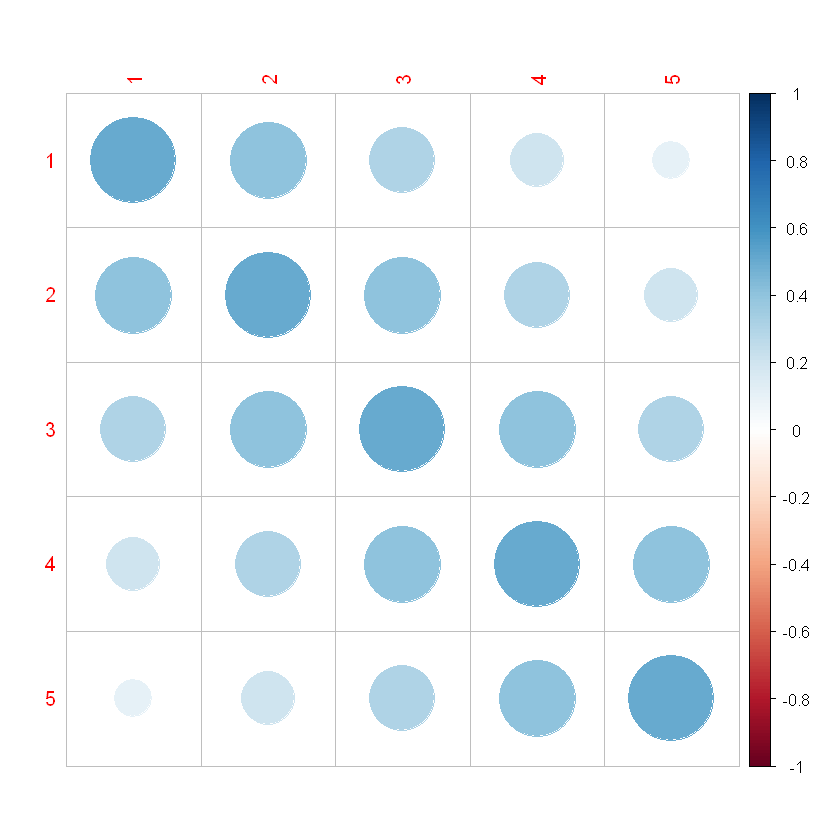

In [42]:
#install.packages("corrplot")
library(corrplot)
corrplot(sigma)

#### 1.5. Simulate bivariate samples from a copula-based distribution with Gumbel and Clayton generator functions. Assume that the two marginal densities are N(0, 1) and $t_{5}$ respectively. Remember to apply the $F^{-1}$ to come from the uniform margins to the $F_{i}$-distributed margins.

#### (1.5a) Visualize the samples and compute the above estimated correlation measures.
#### (1.5b) Check the relationship between the copula parameter and the correlation (Pearson and Spearman) via a simulation study. What can be inferred from this relationship? Increase the sample size for higher precision.


Loading required package: psych

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Loading required package: copula
Loading required package: MASS


Pearson correlation of Gumbel copula = 0.6976346 
Spearman correlation of Gumbel copula = 0.676085 


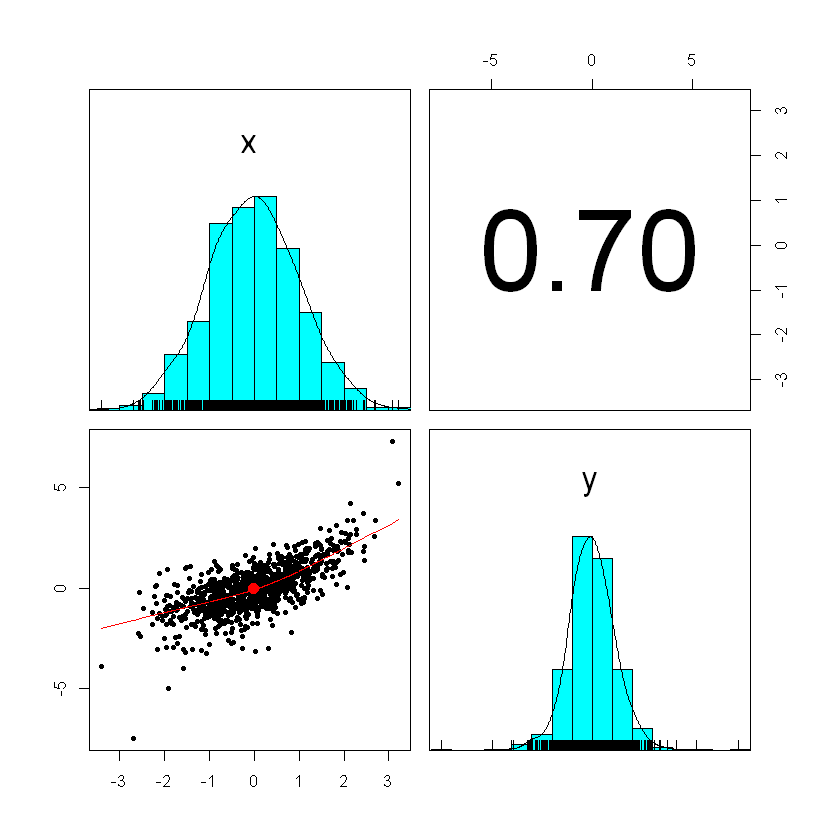

In [34]:
#install.packages("psych")
#install.packages("copula")
require(psych)
require(copula)
require(MASS)

#setup
df<-5
mean<-0
sd<-1

set.seed(888)

#simulation of bivariate samples from a copula-based distribution with generator Gumbel functions
gumbelCop <- gumbelCopula(dim = 2, param = 2)
mvdCopulaG <- mvdc(copula=gumbelCop, margins=c("norm", "t"),
              paramMargins=list(list(mean = mean, sd = sd), 
                                list(df=df)) ) 
mySampleG <- rMvdc(1000, mvdCopulaG)
cat("Pearson correlation of Gumbel copula =" ,cor(mySampleG[,1],mySampleG[,2],method="pearson"),"\n")
cat("Spearman correlation of Gumbel copula =" ,cor(mySampleG[,1],mySampleG[,2],method="spearman"),"\n")
colnames(mySampleG) <- c("x", "y")
pairs.panels(mySampleG)



Pearson correlation of Clayton copula = 0.4758178 
Spearman correlation of Clayton copula = 0.4571252 


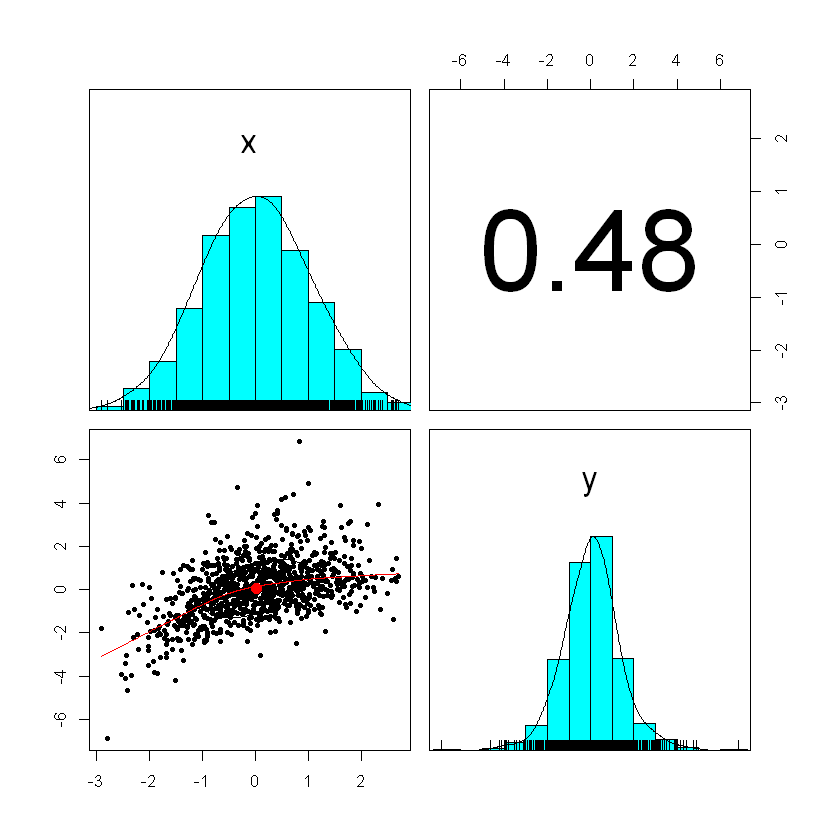

In [35]:
#simulation of bivariate samples from a copula-based distribution with generator Clayton functions
clayton <- claytonCopula(dim = 2, param = 1)
mvdCopulaC <- mvdc(copula=clayton, margins=c("norm", "t"),
              paramMargins=list(list(mean = mean, sd = sd), 
                                list(df=df)) )
mySampleC <- rMvdc(1000, mvdCopulaC)
colnames(mySampleC) <- c("x", "y")
cat("Pearson correlation of Clayton copula =" ,cor(mySampleC[,1],mySampleC[,2],method="pearson"),"\n")
cat("Spearman correlation of Clayton copula =" ,cor(mySampleC[,1],mySampleC[,2],method="spearman"),"\n")
pairs.panels(mySampleC)

#### 6. Obviously it is difficult to pick a statistical distribution which is able to reflect the specific form of the contaminated samples or complex bivariate samples. To be able to assess the distribution properly we can estimate the underlying unknown true density using a kernel density estimator.
#### (1.6a) For the univariate contaminated sample from the above task (with m = 50) compute and plot a nonparametric kernel density estimator with the Gaussian kernel and the Silverman’s bandwidth. 

#### (1.6b) Consider the bivariate samples simulate from the above copula based distributions. Estimate and plot a bivariate kernel density estimator, preferably in an interactive way. Assess the impact of the sample size on the quality of the estimator.

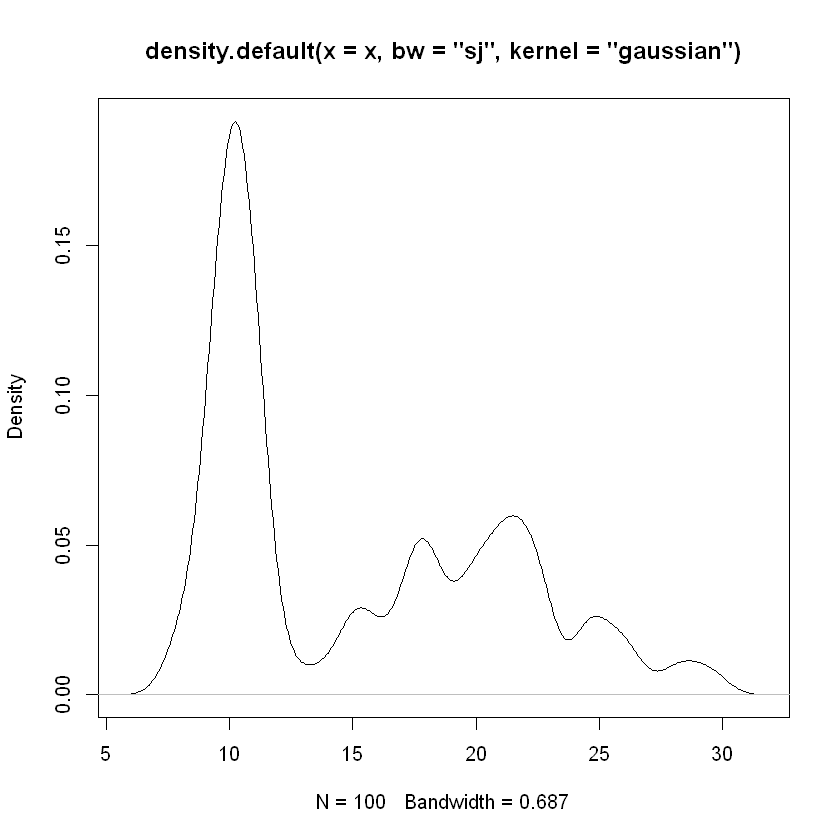

In [40]:
set.seed(1)
U <- rnorm(n=50, m=10, sd=1)
V <- rnorm(n=50, m=20, sd=4)
x <- c(U,V)
d <- density(x, bw = "sj", kernel = "gaussian")

plot(d)

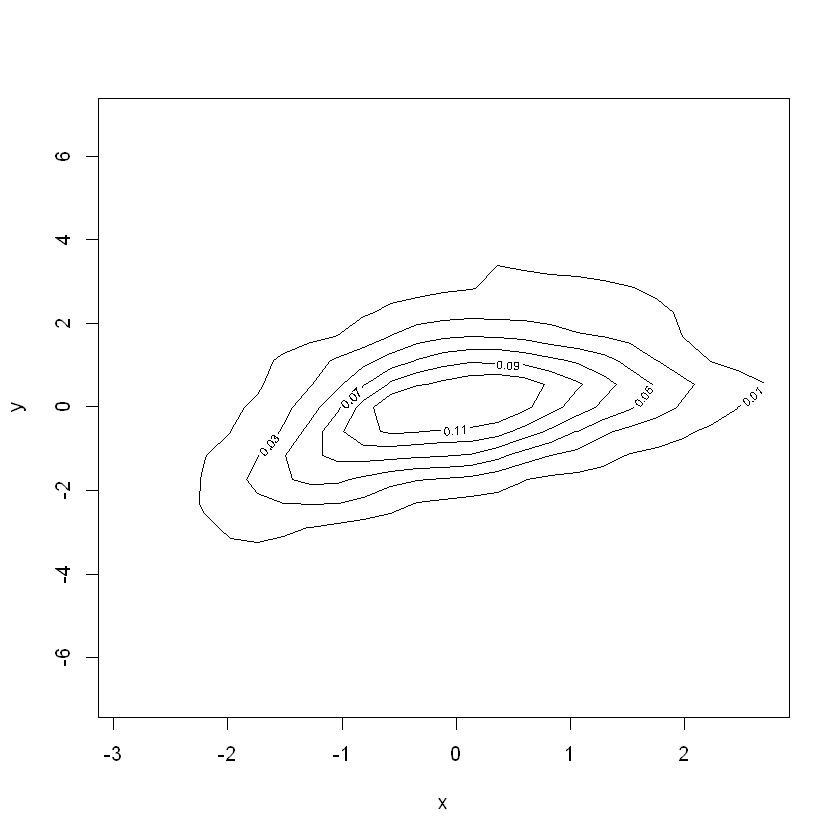

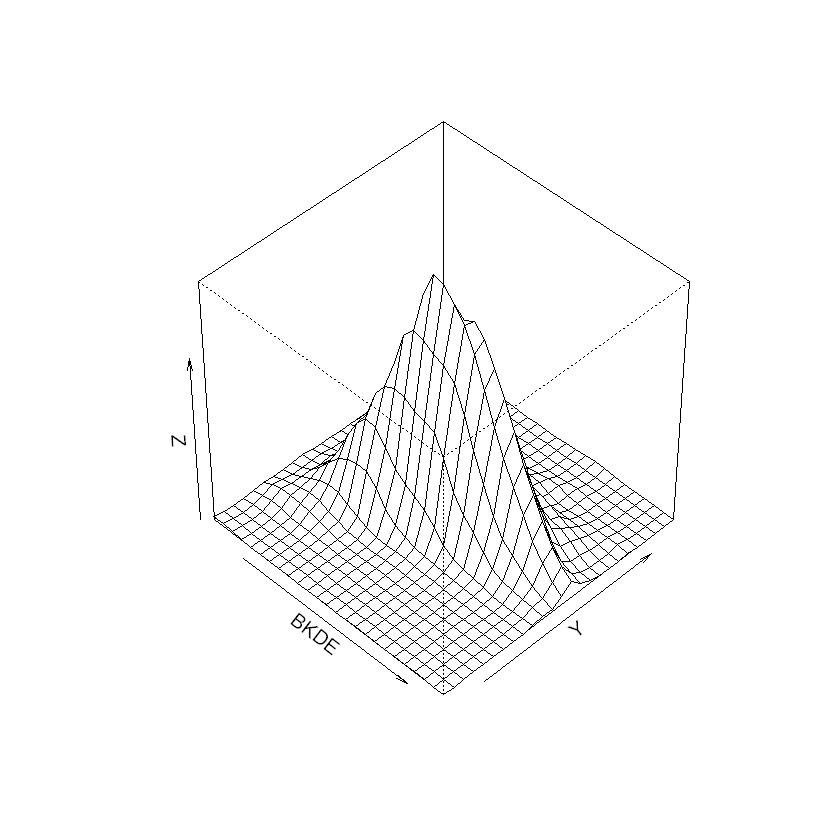

In [43]:
BKDE <- kde2d(mySampleC[,1], mySampleC[,2])

contour(BKDE, xlab = "x",
        ylab = "y", levels  =  c(0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.15, 0.17,0.19) )

persp(BKDE, phi = 45, theta = 45, d = 10)

## Problem 2: Inferential Statistics
### The objective if this part is to get more feeling for statistical tests and estimation procedures

#### 2.1 We start with the verification of the law of large numbers. Thus we check if an estimator converges (in probability) to its true value if the sample size increases. 

#### (2.1a) Simulate samples of size n = 100, . . . , 100000 from a normal distribution with mean 1 and variance 1, i.e. N(1, 1). For each sample estimate the mean, the variance and store them.

In [50]:
#Setup
mu<-1
sd<-1
Var<-c()
Mean<-c()
N<-c()

#simulate reproducible samples from a normal distribution
set.seed(888)
for (n in seq(100,100000,333)) {
  mySample <- rnorm(n, mean=mu, sd=sd) #generate the sample from a normal distribution
  Mean <- append(mean(mySample),Mean) #store the mean of the distribution
  Var <- append(var(mySample),Var) #store the var of the distribution    
  N<-append(n,N) #store the number of observations of each iteration
}

#### (2.1b) Plot the path of sample means and sample variances as function of n. Do the plots support the low of large numbers? Frequently practitioners rely on too small samples for making inferences. How many observations do we need in order to obtain an estimator which is close enough (±1%) to the true value?

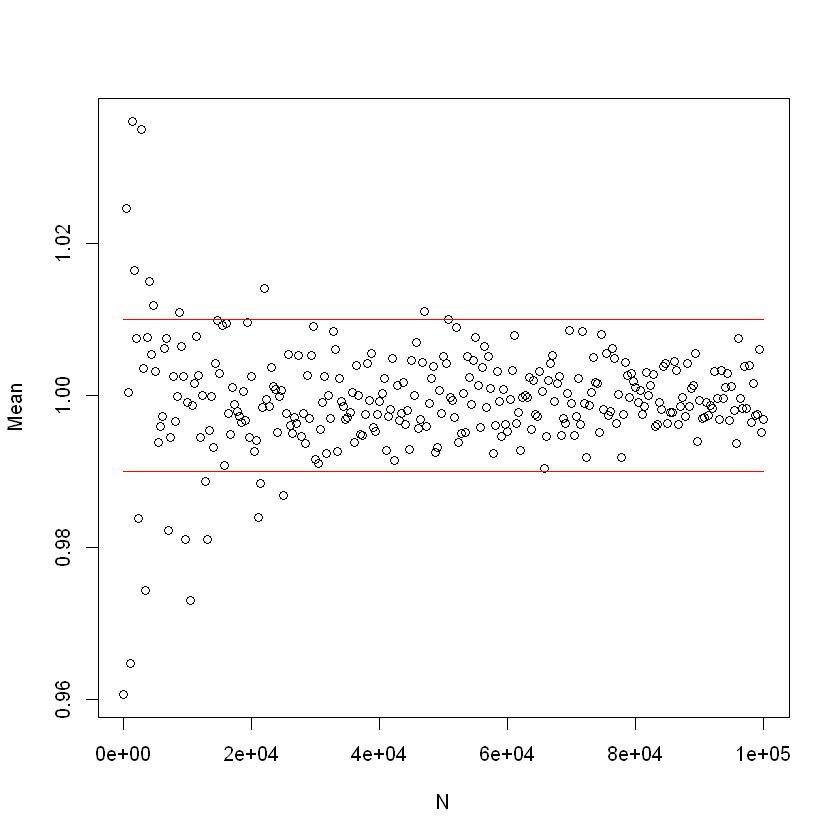

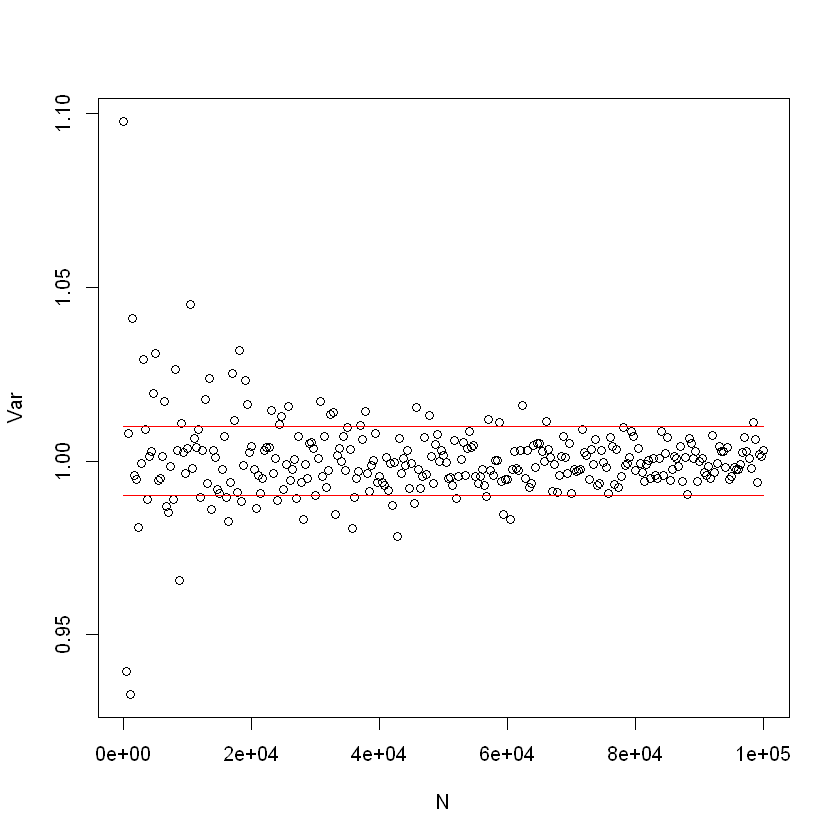

In [51]:
plot(N,Mean, type="p")
lines(N,rep(1.01,length(N)),col="red")
lines(N,rep(0.99,length(N)),col="red")

plot(N,Var, type="p")
lines(N,rep(1.01,length(N)),col="red")
lines(N,rep(0.99,length(N)),col="red")

From the graphs reprosented above, we can conclude that the plots support the low of large numbers and we need a set with the size of at least 65000-70000 in order to obtain an estimator which is close enough (±1%) to the true value.

#### (2.1c) Add to the plot the 95% confidence intervals. These have to be constructed manually. Provide their interpretation.


In [57]:
#Setup
mu<-1
sd<-1
Var<-c()
Mean<-c()
N<-c()
LMean<-c()
UMean<-c()
LVar<-c()
UVar<-c()

set.seed(888)
for (n in seq(100,100000,333)) {
  mySample <- rnorm(n, mean=mu, sd=sd) #generate the sample from a normal distribution
  Mean <- append(mean(mySample),Mean) #store the mean of the distribution
  Var <- append(var(mySample),Var) #store the var of the distribution

  errorMean <- qnorm(0.975)*var(mySample)/sqrt(n) #error for Mean 
  
  LMean <- append(mean(mySample)-errorMean,LMean)
  UMean <- append(mean(mySample)+errorMean,UMean)
    
  LVar <- append((n-1)*var(mySample)/((n-1)-sqrt(2*(n-1))),LVar)
  UVar <- append((n-1)*var(mySample)/((n-1)+sqrt(2*(n-1))),UVar)               

  N<-append(n,N) #store the number of observations of each iteration
}

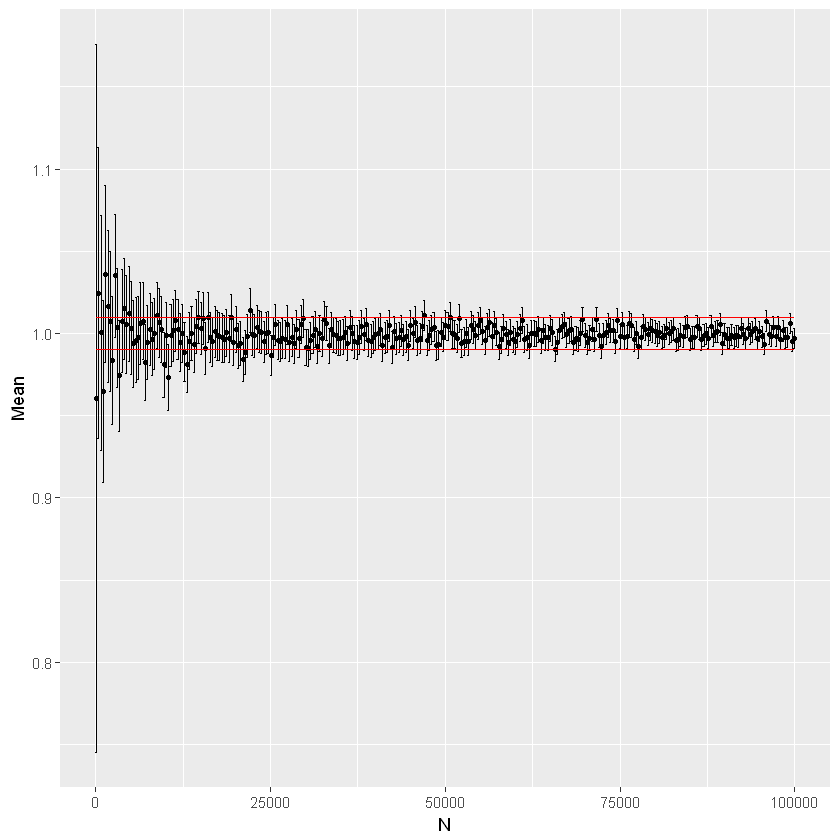

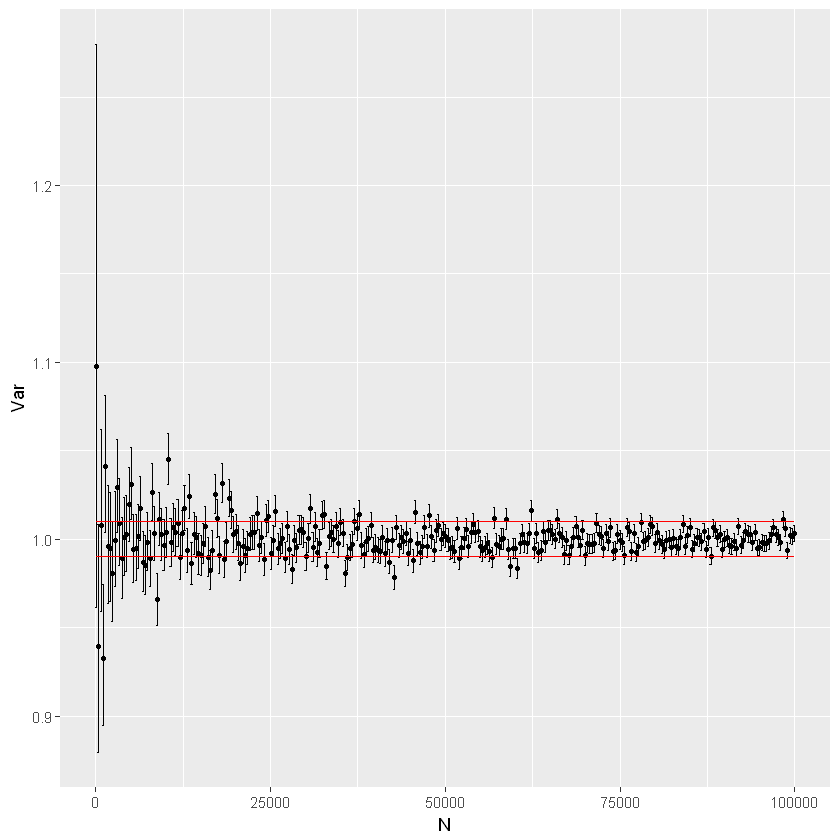

In [58]:
U<-rep(1.01,length(N))
L<-rep(0.99,length(N))
df<-data.frame(N,Mean,LMean,UMean,U,L,Var,LVar,UVar) 

require(ggplot2)

#plot for Mean
ggplot(df) +
  geom_point(aes(x=N, y=Mean), size=1) +
  # Confidence interval
  geom_errorbar(aes(x = N,ymax = UMean, ymin = LMean)) +
  # +1%
  geom_line(aes(x = N, y = U), colour="red")+
  # -1%
  geom_line(aes(x = N, y = L), colour = "red")

#plot for Var
ggplot(df) +
  geom_point(aes(x=N, y=Var), size=1) +
  # Confidence interval
  geom_errorbar(aes(x = N,ymax = UVar, ymin = LVar)) +
  # +1%
  geom_line(aes(x = N, y = U), colour="red")+
  # -1%
  geom_line(aes(x = N, y = L), colour = "red")



95% confidence interval as an interval with a 0.95 probability of containing the mean value of the sample. The smaller sample we have the bigger error we obtain. Here we face with one more support the low of large numbers, which is usually neglected by practitioners who rely on too small
samples for making inferences. However, it is obviously that estimator converges (in probability) to its true value if the sample size increases.

#### 2.2 Next we assess the asymptotic distribution of the estimators (in sense of the central limit theorem).

#### (2.2a) Simulate b = 1000 samples of size n = 100 from a normal distribution with mean 1 and variance 1, i.e. N(1, 1). For each sample estimate the mean, the variance and store them.

In [92]:
#Setup
mu<-1
sd<-1
Var<-c()
Mean<-c()
n<-100
b<-1000
set.seed(888)

#generating 1000 samples and storing theis mean and var
for (i in 1:b) {
  mySample <- rnorm(n, mean=mu, sd=sd)
  Mean <- append(Mean,mean(mySample))
  Var <- append(Var,var(mySample))
}
#length(Mean); length(Var)
df<-data.frame(n=rep(b,length(Mean)),Mean,Var,mu)

#### (2.2b) Plot the KDE or a histogram for the sample of means and variances. Add the density of the normal distribution for comparison purposes. Check the impact of n on the results (animation or interactive). Let n vary from 100 to 1000000.

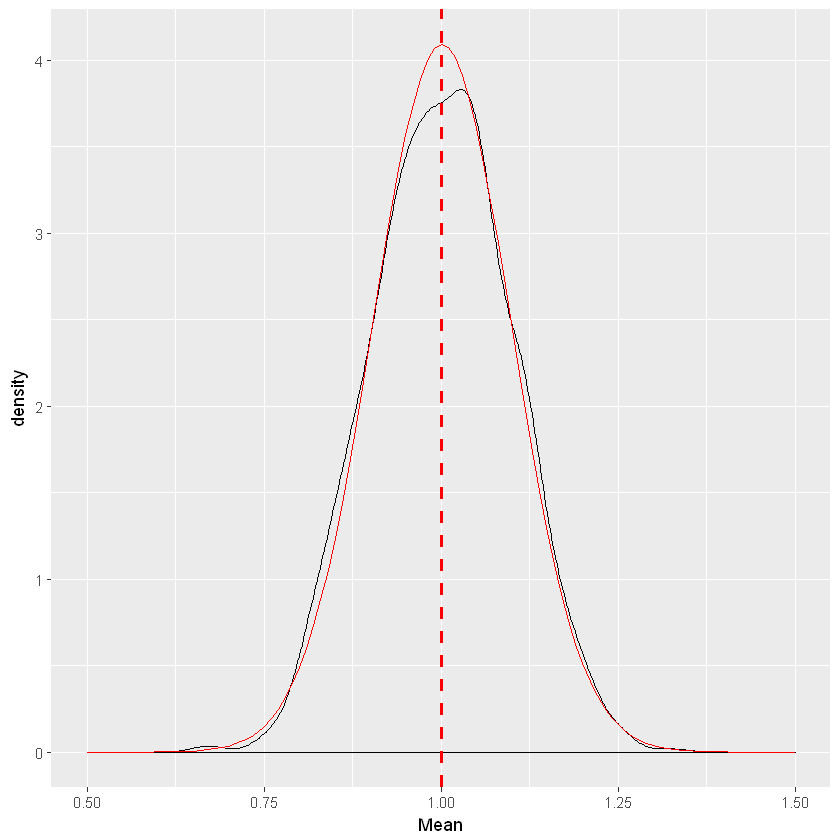

In [96]:
#plot of the KDE for the sample of means 
require(ggplot2)
base<-ggplot(df, aes(x=Mean)) +
  geom_density(alpha = 0.2) +
  geom_vline(aes(xintercept=mu),  #vertical line = density of the normal distribution
             color="red", linetype="dashed", size=1)+
  xlim(0.5, 1.5)
base+stat_function(fun = dnorm, color = "red", args = list(mean = mean(Mean), sd = sd(Mean)))

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."

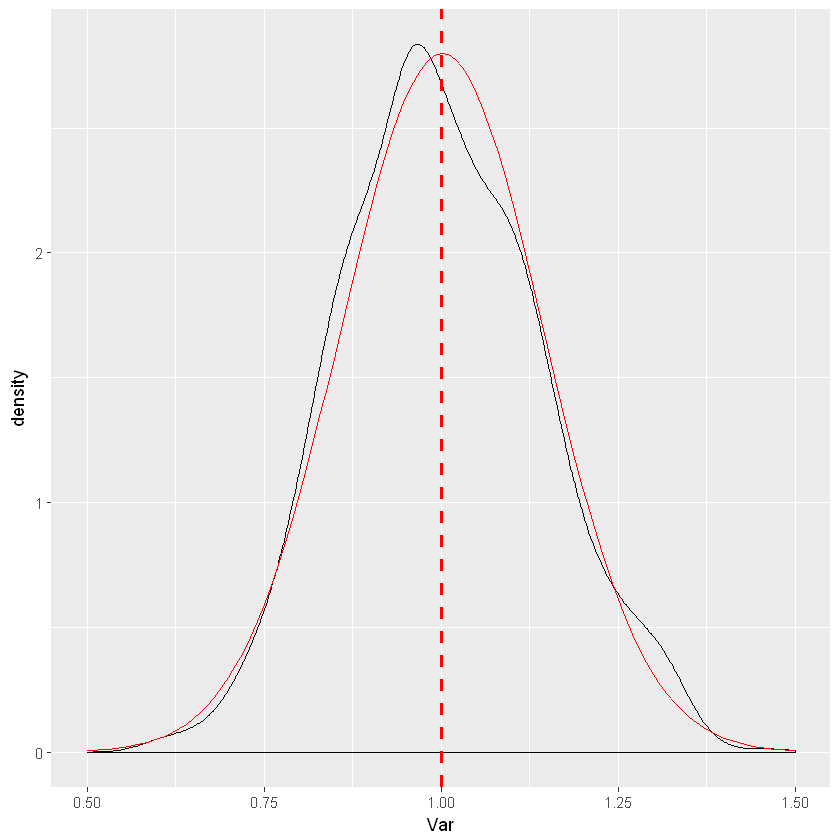

In [95]:
#plot of the KDE for the sample of vars 
require(ggplot2)
base<-ggplot(df, aes(x=Var)) +
  geom_density(alpha = 0.2) +
  geom_vline(aes(xintercept=mu),  #vertical line = density of the normal distribution
             color="red", linetype="dashed", size=1)+
  xlim(0.5, 1.5)
base+stat_function(fun = dnorm, color = "red", args = list(mean = mean(Var), sd = sd(Var)))

In [112]:
#Check the impact of n on the results when n vary from 100 to 1000000.
Mean<-c()
Var<-c()
N<-c()
Df<-data.frame()

n<-c(100,1000,10000,100000,1000000)
set.seed(888)
for (k in n){
  for (i in 1:b) {
    mySample <- rnorm(k, mean=mu, sd=sd)
    Mean <- append(Mean,mean(mySample))
    Var <- append(Var,var(mySample))
  }  
  Df<-rbind(Df,data.frame(N=rep(k,length(Mean)),Mean,Var))
  Mean<-c()
  Var<-c()
}

Df$N<-sapply(Df$N,as.character)#change N type to be characther

Warning message:
"Removed 3 rows containing non-finite values (stat_density)."

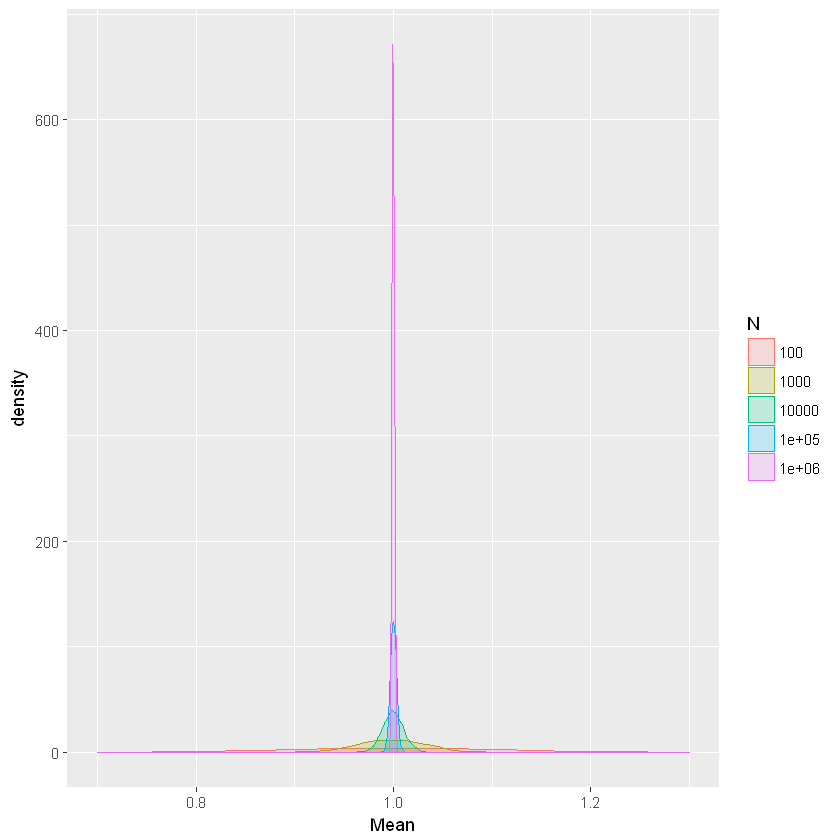

In [87]:
require(ggplot2)
#plot of the KDE for the sample of means for different size of samples
ggplot(Df, aes(x=Mean, colour=N, fill=N)) +  
  geom_density(alpha = 0.2)+
  xlim(0.7, 1.3)

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."

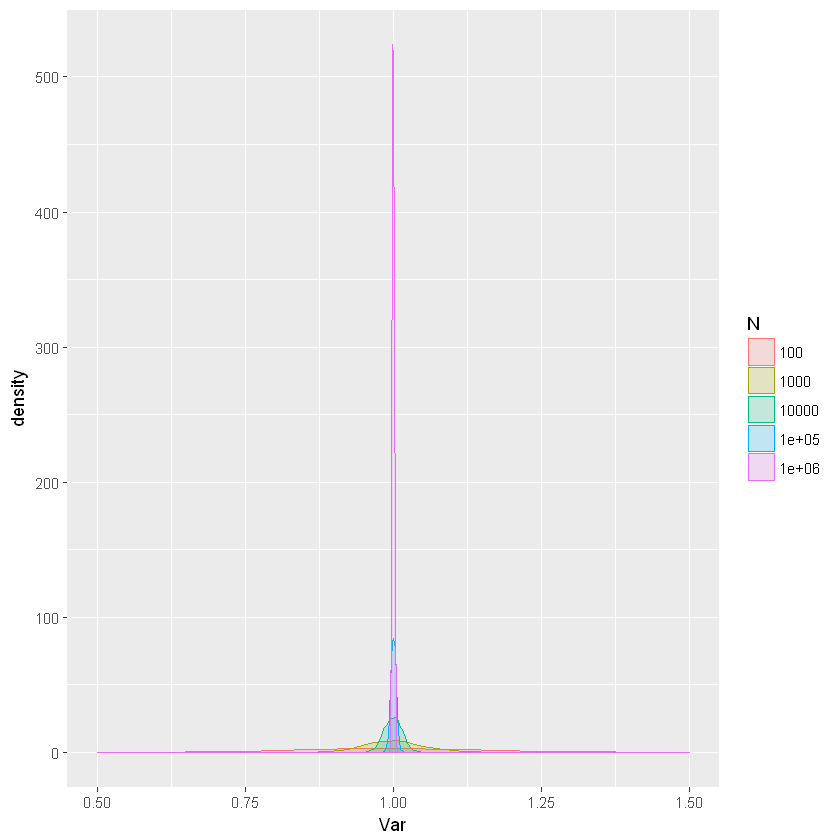

In [85]:
#plot of the KDE for the sample of vars for different size of samples
ggplot(Df, aes(x=Var, colour=N, fill=N)) +  
  geom_density(alpha = 0.2)+
  xlim(0.5, 1.5)

#### (2.2c) Simulate now b = 1000 samples of size n = 100 from a $\chi^2_{1}$ distribution. Plot the histogram or KDE and vary the sample size as above. Do the results support the CLT too?

In [116]:
#setup
Var_chi<-c()
Mean_chi<-c()
n<-100
b<-1000
set.seed(888)

#generating 1000 samples and storing theis mean and var
for (i in 1:b) {
  mySample_chi <- rchisq(n, df=1)
  Mean_chi <- append(Mean_chi,mean(mySample_chi))
  Var_chi <- append(Var_chi,var(mySample_chi))
}

df<-data.frame(n=rep(b,length(Mean_chi)),Mean_chi,Var_chi)

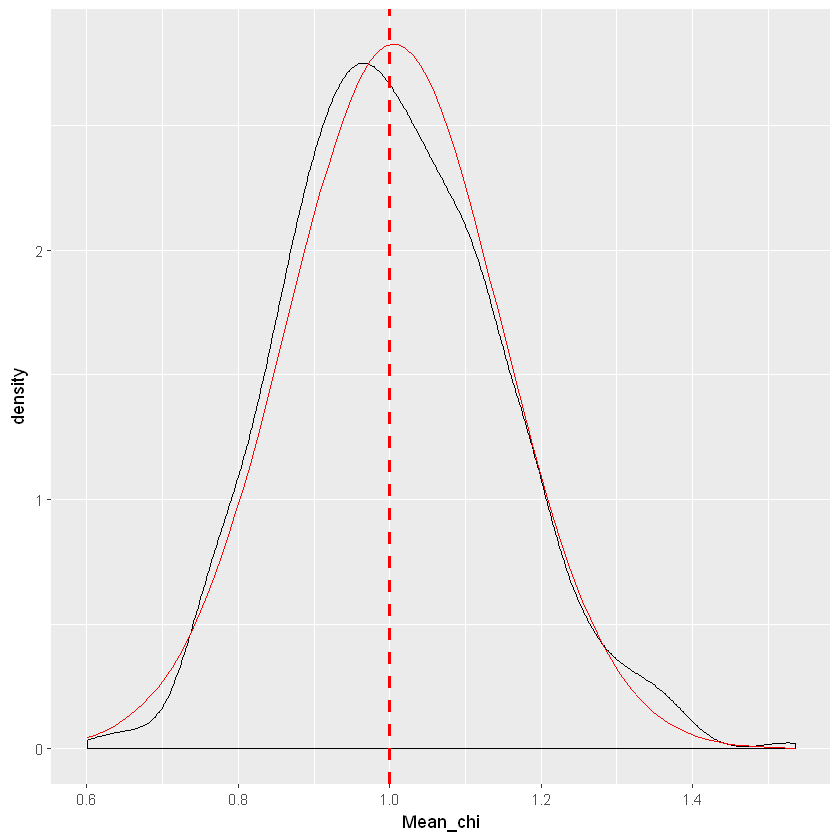

In [117]:
require(ggplot2)
base <- ggplot(df, aes(x=Mean_chi)) +
  geom_density(alpha = 0.2) +
  geom_vline(aes(xintercept=mu),  #vertical line = density of the normal distribution
             color="red", linetype="dashed", size=1)
base+stat_function(fun = dnorm, color = "red", args = list(mean = mean(Mean_chi), sd = sd(Mean_chi)))

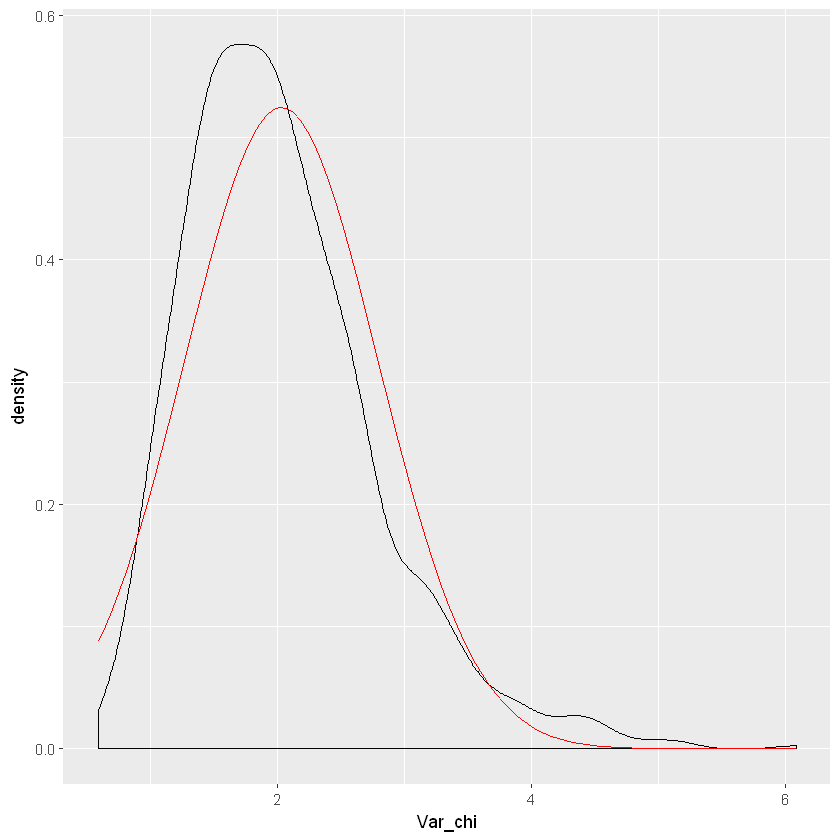

In [118]:
base<-ggplot(df, aes(x=Var_chi)) +
  geom_density(alpha = 0.2)
base+stat_function(fun = dnorm, color = "red", args = list(mean = mean(Var_chi), sd = sd(Var_chi)))

In [123]:
# Plot the histogram or KDE and vary the sample size as above. Do the results support the CLT too?
Var_chi<-c()
Mean_chi<-c()
Df_chi<-data.frame()
b<-1000
n<-c(100,1000,10000,100000,1000000)
set.seed(888)
for (k in n){
  for (i in 1:b) {
    mySample_chi <- rchisq(n, df=1)
    Mean_chi <- append(Mean_chi,mean(mySample_chi))
    Var_chi <- append(Var_chi,var(mySample_chi))
  }  
  Df_chi<-rbind(Df_chi,data.frame(N=rep(k,length(Mean_chi)),Mean_chi,Var_chi))
  Mean_chi<-c()
  Var_chi<-c()
}

Df_chi$N<-sapply(Df_chi$N,as.character)

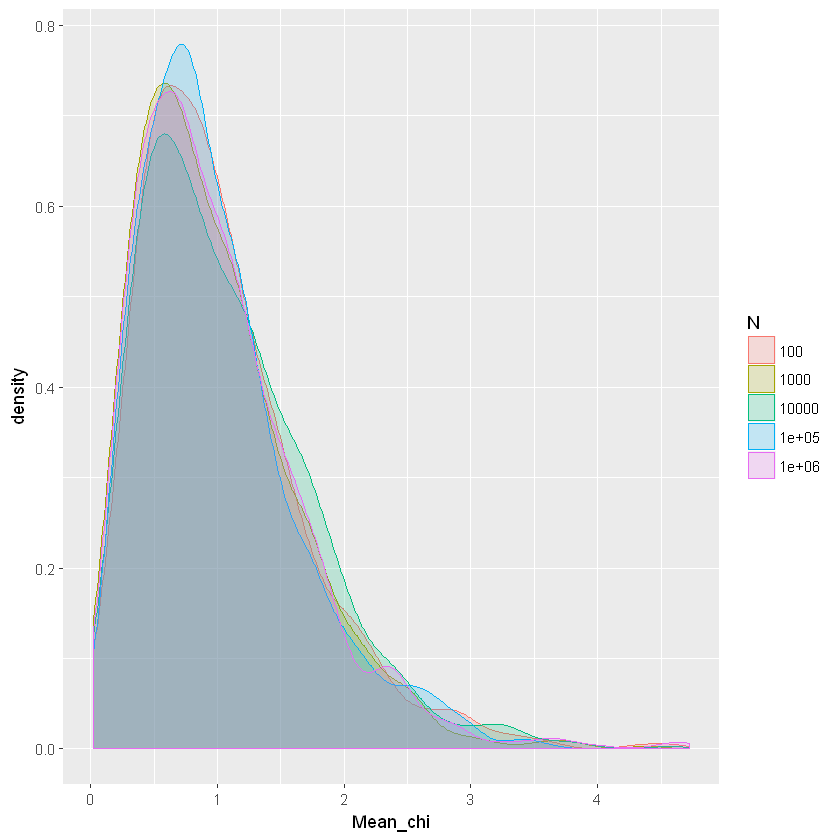

In [125]:
ggplot(Df_chi, aes(x=Mean_chi, colour=N, fill=N)) +  
  geom_density(alpha = 0.2)

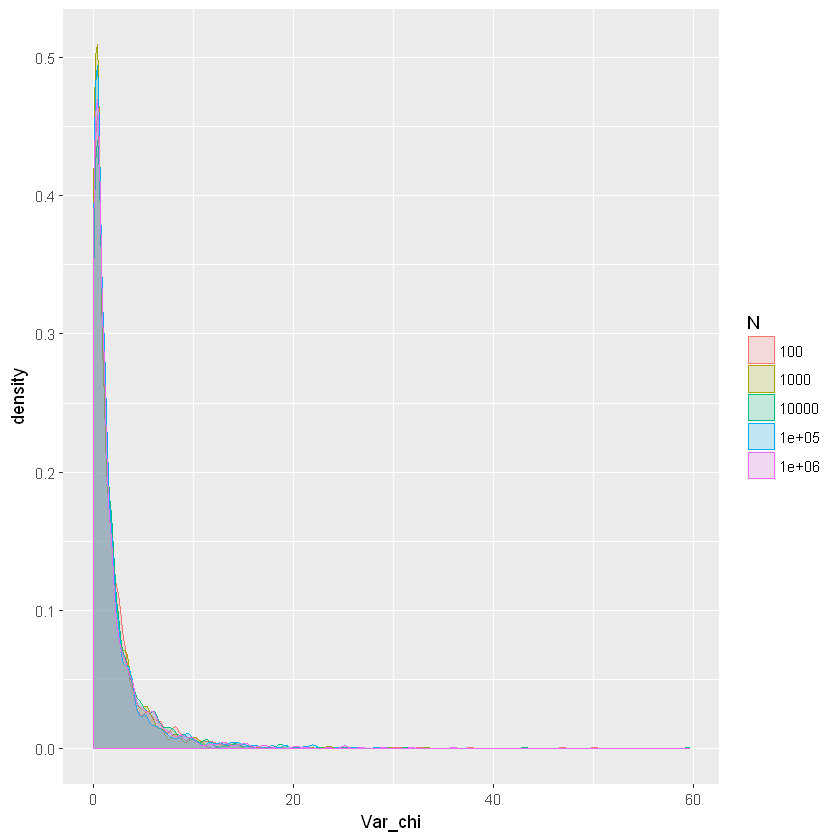

In [111]:
ggplot(Df_chi, aes(x=Var_chi, colour=N, fill=N)) +  
  geom_density(alpha = 0.2)

The obtained results for Chi-square distribution supports the CLT. When number of samples N increases mean converges to df.

#### 2.3 The estimation for non-standard distributions/models usually follows the maximumlikelihood principle. The t-distribution is a popular alternative if the sample distribution is symmetric but exhibits heavier tails compared to the normal distribution.

#### (2.3a) Let $x_{1}, ..., x_{n}$ be a given sample. We assume that it stems from a t-distribution with an unknown number of degrees of freedom. Write down the corresponding likelihood function.

Probability density function of t-student distribution:
$f(x) = \frac{\Gamma(\frac{n}{2})}{\sqrt((n-1) \pi) \Gamma(\frac{n-1}{2})}(1 + \frac{x^2}{n-1})^{-\frac{n}{2}}$

Corresponding likelihood function:
$L_{\theta}(x)=\prod\limits_{i=1}^n\frac{\Gamma(\frac{\theta}{2})}{\sqrt((\theta-1) \pi) \Gamma(\frac{\theta-1}{2})}(1 + \frac{x^2_{i}}{\theta-1})^{-\frac{\theta}{2}}$



#### (2.3b) Simulate a sample of size n = 100 from $t_{5}$. Maximize the likelihood function (numerically) for the given sample and obtain the ML estimator of the number of degrees of freedom.

In [129]:
n<-100
df<-5
set.seed(888)
mySample<-rt(n, df)

#install.packages("fitdistrplus")
library(fitdistrplus)
myFt<-fitdist(mySample, "t", method = "mle", start = 1)
myEstimator<-myFt$estimate
myEstimator

Loading required package: survival


[1] 4.500826

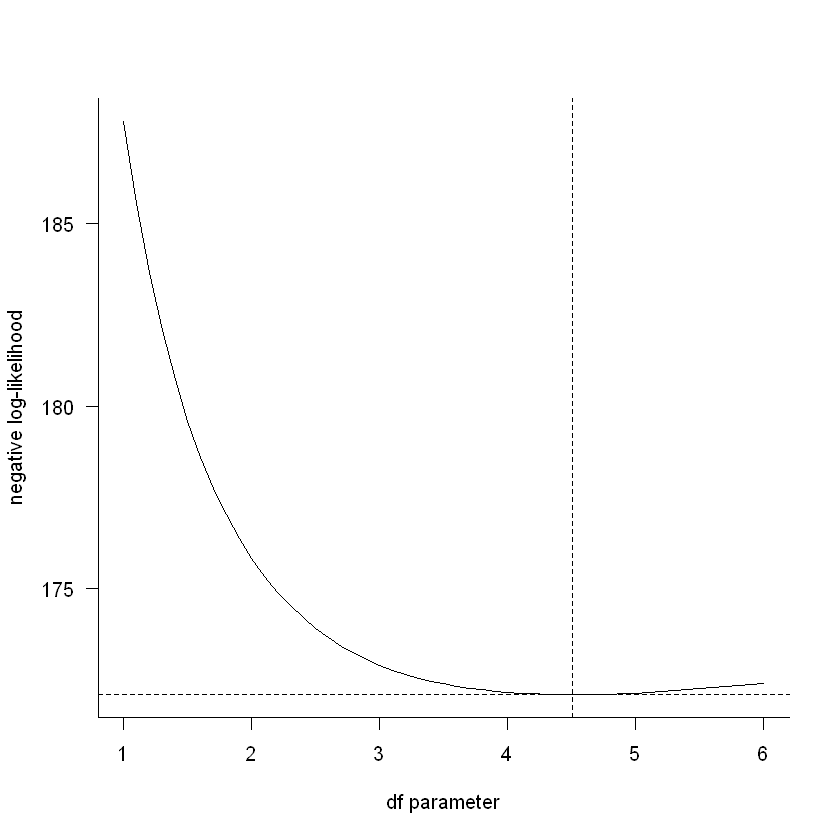

In [135]:
#alternatively
#install.packages("logLik")
LL <- function(p,data=mySample) {
  -sum(dt(data,df=p,log=TRUE))
}
pvec <- seq(1,6,by=0.1)
Lvec <- sapply(pvec,LL)
par(las=1,bty="l")
plot(pvec,Lvec,type="l",
     xlab="df parameter",ylab="negative log-likelihood")
## superimpose fitdistr results ...
abline(v=coef(myFt),lty=2)
abline(h=-logLik(myFt),lty=2)

#### (2.3c) Relying on the asymptotic properties of the ML estimators compute (numerically) the variance of this estimator.

In [130]:
myVarienceOfEstimator<-(myFt$sd)^2
myVarienceOfEstimator

[1] 2.412045

#### 2.4. Next we assess the properties and the performance of statistical tests. We restrict the discussion to the two-sided tests for the mean only.
    
#### (2.4a) To assess the size of a test we perform the following experiment: simulate b = 1000 samples of size n = 100 from a Gaussian distribution with µ = 1 and σ = 1. For each sample run the t-test with the null hypothesis $H_{0}$ : µ = 1 and the level of significance α = 5%. Count the number of rejections and non-rejections of $H_{0}$. Which interpretation has the fraction of the rejected $H_{0}$’s?

In [149]:
#Setup
mu<-1
sd<-1
n<-100
b<-1000
rej<-0
appr<-0

#generating 1000 samples from a Gaussian distribution with µ = 1 and σ = 1
set.seed(888)
for (i in 1:b) {
  mySample <- rnorm(n, mean=mu, sd=sd)
  tt<-t.test(mySample, mu=1)
  if (tt$p.value<0.05) {
    rej<-rej+1 #count the number of rejections
  }else{
    appr<-appr+1 #count the number non-rejections
  }
}
cat("Overall number of samples: ", b,"\n")
cat("Number of rejections: ",rej,"\n")
cat("Number of non-rejections: ",appr,"\n")

#tt$statistic #t
#tt$p.value
#tt$parameter #- dt

Overall number of samples:  1000 
Number of rejections:  34 
Number of non-rejections:  966 


Fraction of rejected Ho shows us how many unusual samples we have, where our null hypothesis cannot be proved.

#### (2.4b) To assess the power of a test we perform another experiment: simulate again b = 1000 samples of size n = 100 from the same distribution, but for each sample run the t-test with the null hypothesis $H_{0}$ : $\mu = \mu_{0}$ where $\mu_{0}$ takes some fixed values between -1 and 3. For each fixed $\mu_{0}$ count the number of rejections and non-rejections of $H_{0}$. Consider the fraction of rejected $H_{0}$’s.


In [12]:
#Setup
mu<-1
sd<-1
n<-100
b<-1000
rej<-0
appr<-0
set.seed(888)
#Mu<-c(-1,0,1,2,3)
DF<-data.frame()

#generating 1000 samples for each µo in range [-1:3] with a step 0.01
for (Mu in seq(-1,3,0.01)){
  for (i in 1:b) {
    mySample <- rnorm(n, mean=mu, sd=sd)
    tt<-t.test(mySample, mu=Mu)
    if (tt$p.value<0.05) {
      rej<-rej+1
    }else{
      appr<-appr+1
    }
      
  }  
  DF<-rbind(DF,data.frame(Mu,rej,appr))
  rej<-0
  appr<-0
}  


#### (2.4c) Plot the above fraction as a function of $\mu_{0}$. This fraction estimates the probability of rejecting the null hypothesis if it is incorrect. Derive/write down this function from theoretical considerations and compare the derived function with the estimated one graphically.

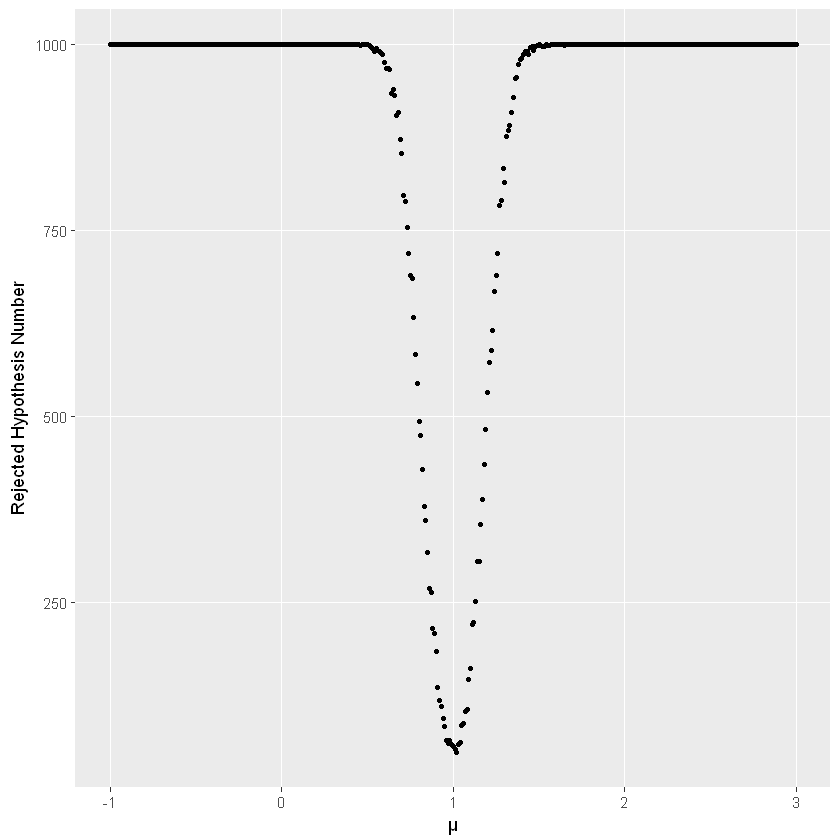

In [241]:
require(ggplot2)
ggplot(DF) +
  geom_point(aes(x=Mu, y=rej), size=1)+
  theme(panel.grid.minor=element_blank())+
  ylab("Rejected Hypothesis Number")+
  xlab("µ")+
  xlim(-1,3)

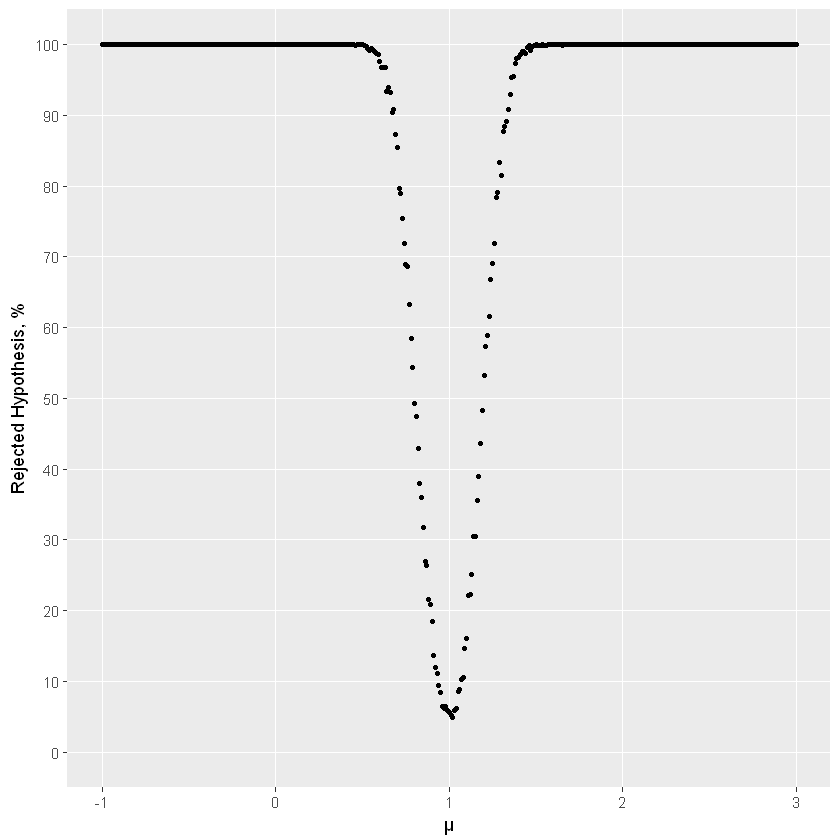

In [242]:
# the same however represents not the absolute value of rejections but the percentage 
ggplot(DF) +
  geom_point(aes(x=Mu, y=rej/1000*100), size=1)+
  theme(panel.grid.minor=element_blank())+
  ylab("Rejected Hypothesis, %")+
  xlab("µ")+
  xlim(-1,3)+
  coord_cartesian(ylim=c(100,0)) + 
  scale_y_continuous(breaks=seq(100, 0, -10))

In [243]:
#teoretical consideration of power function
#setup
n <- 100                
sd <- 1              
mu <- 1                # hypothetical mean              
alpha <- .05           # significance level
theorDF <- data.frame()
set.seed(888)

I = c(alpha/2, 1-alpha/2)
for (Mu in seq(-1,3,0.01)){ 
    q <- qnorm(I, mean=mu, sd=sd/sqrt(n))
    p <- pnorm(q, mean=Mu, sd=sd/sqrt(n))
    theor <- 1-diff(p)
    theorDF<-rbind(theorDF,data.frame(Mu,theor))
}    

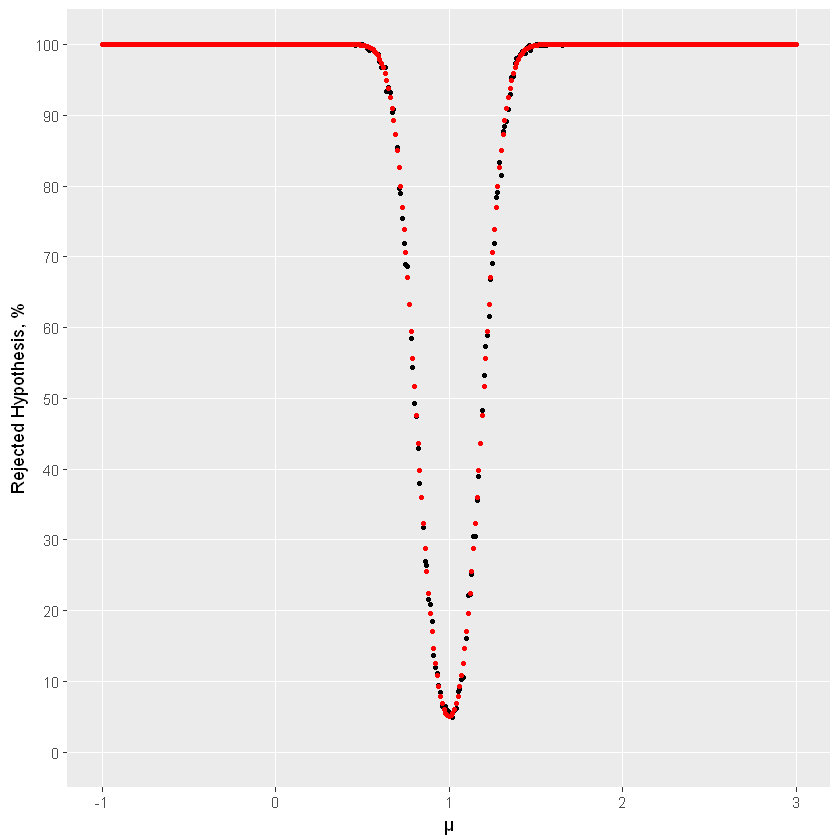

In [244]:
# plot together estimation of power function and its theoretical consideration
ggplot(NULL) +
  geom_point(data=DF, aes(x=Mu, y=rej/1000*100), size=1)+
  theme(panel.grid.minor=element_blank())+
  ylab("Rejected Hypothesis, %")+
  xlab("µ")+
  xlim(-1,3)+
  coord_cartesian(ylim=c(100,0)) + 
  scale_y_continuous(breaks=seq(100, 0, -10))+
  geom_point(data=theorDF, aes(x=Mu,y=theor*100),colour="red", size=1)

As we can notice from the last graph our simulated power function and teortical function match. 

#### (2.4d) The whole idea of the power/size of a test heavily relies on the true underlying distribution of the sample. Repeat the above experiment by sampling the data not from the Gaussian, but from an alternative distribution, for example $t_{2}$ or $\chi^2_{1}$ (add one to the sample to attain the same true mean). Compare the resulting simulated power function with the power function for the Gaussian case. What can be concluded above the power of the t-test if the distributional assumption is not fulfilled?


In [6]:
#Setup
n<-100
b<-1000
df<-1
rej<-0
appr<-0
mu<-1
sd<-1
DF<-data.frame()

set.seed(888)
for (Mu in seq(-1,3,0.01)){
  for (i in 1:b) {
  mySample <- rnorm(n, mean=Mu, sd=sd)  
  mySampleChi <- rchisq(n, df=1)
  myBSample<- append(mySampleChi,mySample)  
  tt<-t.test(myBSample)
    if (tt$p.value<0.05) {
      rej<-rej+1
    }else{
      appr<-appr+1
    }
  }  
  DF<-rbind(DF,data.frame(Mu,rej,appr))
  rej<-0
  appr<-0
}  

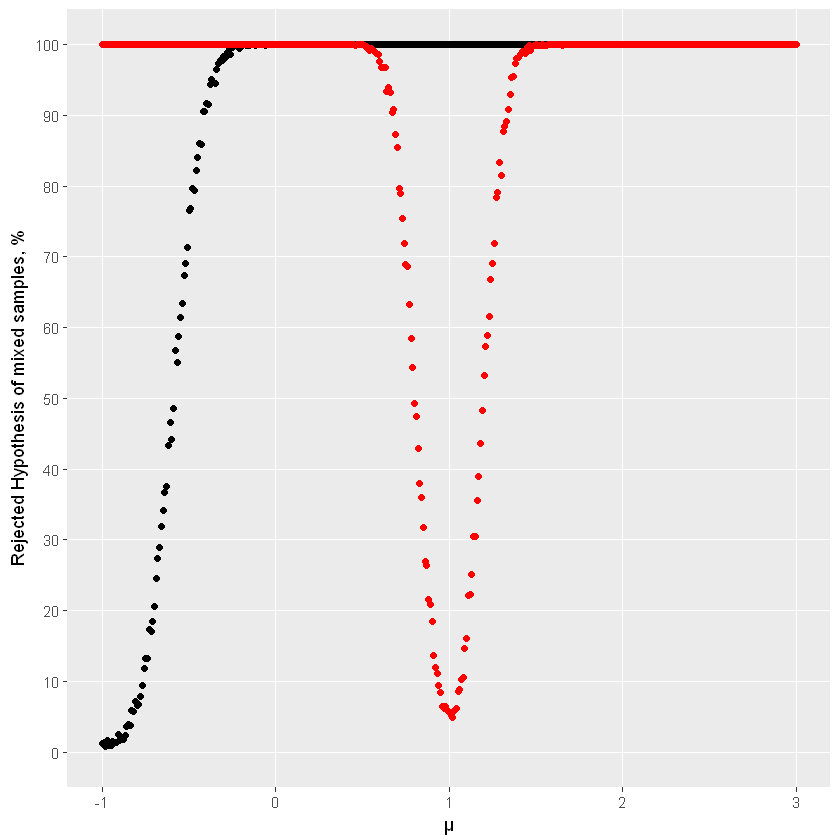

In [13]:
# plot together the power function of normal and mixed (chi+normal) distributions 
require(ggplot2)
ggplot(NULL, aes(x=Mu, y=rej/1000*100), size=1) +
  geom_point(data=DFMixed)+
  theme(panel.grid.minor=element_blank())+
  ylab("Rejected Hypothesis of mixed samples, %")+
  xlab("µ")+
  xlim(-1,3)+
  coord_cartesian(ylim=c(100,0)) + 
  scale_y_continuous(breaks=seq(100, 0, -10))+
  geom_point(data=DF, colour="red")

Since we have a sample obtained from the simulation of chi-square and the normal distributions, t-test is not working properly as it was expected. 